# Titanic

In [10]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# Read Data

In [11]:
train  = pd.read_csv("../input/titanic/train.csv")
test   = pd.read_csv("../input/titanic/test.csv")
sample = pd.read_csv("../input/titanic/gender_submission.csv")

# Check Data

In [12]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [13]:
sample.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [14]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

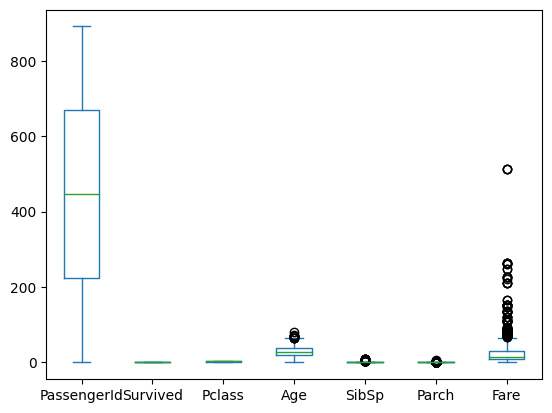

In [16]:
train.plot(kind='box')

In [17]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [18]:
train.corr()

/var/folders/89/cffytmz50wjbl3q6cf2bvvs00000gn/T/ipykernel_6600/2189804198.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


/var/folders/89/cffytmz50wjbl3q6cf2bvvs00000gn/T/ipykernel_6600/1524494364.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr())


<Axes: >

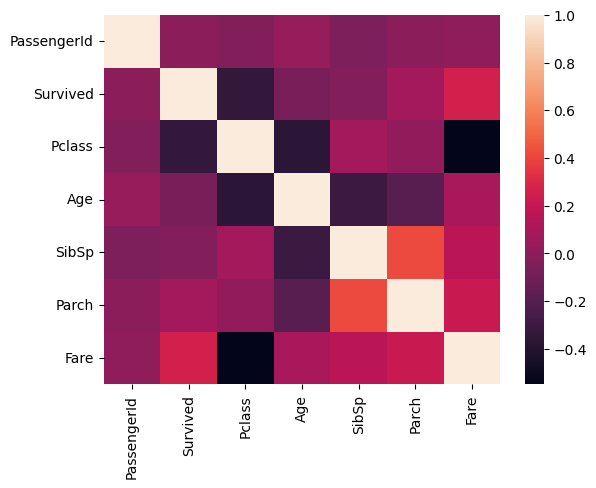

In [19]:
sns.heatmap(train.corr())

# Preprocessing

In [20]:
train_x = train.drop("Survived", axis=1)
train_y = train["Survived"]
test_x  = test

In [21]:
# remove PassebgerId, Name, Ticket, Cabin
train_x = train_x.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)
test_x  = test_x.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)

In [22]:
# Fill NA
train["Age"] = train["Age"].fillna(train["Age"].median())
train["Embarked"] = train["Embarked"].fillna("S")

# label encoding(str -> int)
from sklearn.preprocessing import LabelEncoder
for c in ["Sex", "Embarked"]:
    le = LabelEncoder()
    le.fit(train_x[c].fillna("NA"))
    train_x[c] = le.transform(train_x[c].fillna("NA"))
    test_x[c]  = le.transform(test_x[c].fillna("NA"))

# Model Tunning

In [23]:
import itertools
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection import KFold
from xgboost import XGBClassifier

In [24]:
# parameters
param = {
    "max_depth":[3,5,7,9],
    "min_child_weight":[1, 2, 4,6]
}

param_comb = itertools.product(param["max_depth"], param["min_child_weight"])

In [25]:
df = pd.DataFrame([], columns =["name","max_depth", "min_child_weight", "scores"])

for max_depth, min_child_weight in param_comb:
    score = []
    # cross-validation
    kf = KFold(n_splits=4, shuffle=True, random_state=123456)
    for tr_idx, va_idx in kf.split(train_x):
        tr_x, va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]
        tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]

        # learn
        model = XGBClassifier(max_depth=max_depth,
                                min_child_weight=min_child_weight,
                                use_label_encoder =False)

        model.fit(tr_x, tr_y,eval_metric='logloss')
        # predict
        va_pred = model.predict_proba(va_x)[:,1]
        # score
        logloss = log_loss(va_y, va_pred)
        score.append(logloss)
    
    addRow = pd.Series([str(max_depth)+"-"+str(min_child_weight), max_depth, min_child_weight, np.mean(score)], index=df.columns)
    df = df.append(addRow, ignore_index=True)

/Users/yuhi-sa/.anyenv/envs/pyenv/versions/3.10.4/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/yuhi-sa/.anyenv/envs/pyenv/versions/3.10.4/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/yuhi-sa/.anyenv/envs/pyenv/versions/3.10.4/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/yuhi-sa/.anyenv/envs/pyenv/versions/3.10.4/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.wa

<Axes: xlabel='name', ylabel='scores'>

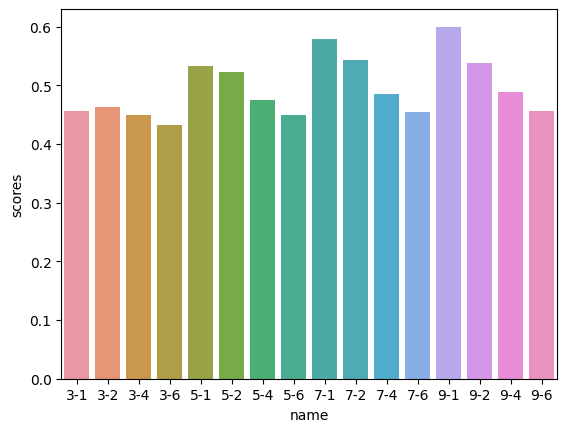

In [26]:
sns.barplot(x="name", y="scores", data=df)

In [27]:
best_max_depth = 9
best_min_child_weight = 1

# Predict by Ensemble

In [28]:
# xgbppst
model_xgb = XGBClassifier(max_depth=best_max_depth,
                            min_child_weight=best_min_child_weight,
                            use_label_encoder=False)
model_xgb.fit(train_x, train_y, eval_metric='logloss')
pred_xgb = model_xgb.predict_proba(test_x)[:,1]

# LigisticRegression
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(solver="lbfgs", max_iter=300)
model_lr.fit(train_x.fillna(0), train_y.fillna(0))
pred_lr = model_lr.predict_proba(test_x.fillna(0))[:,1]

pred = pred_xgb*0.9 + pred_lr*0.1
pred_label = np.where(pred>0.5, 1,0)

/Users/yuhi-sa/.anyenv/envs/pyenv/versions/3.10.4/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/yuhi-sa/.anyenv/envs/pyenv/versions/3.10.4/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


# submission

In [29]:
submission = pd.DataFrame({"PassengerId":test["PassengerId"],"Survived":pred_label})
submission.to_csv("submission.csv",index=False)